<a href="https://colab.research.google.com/github/dhkdsns20/AI-Basic/blob/main/showmap_dijkstra_final_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Path Finding Algorithm
## Find strongest path with thpt

In [ ]:
!pip install osmnx




[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# from pyrosm import OSM
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import folium
import heapq

#  Ï∂úÎ∞úÏßÄ Î∞è Î™©Ï†ÅÏßÄ ÎÖ∏Îìú ÏÑ§Ï†ï Ìï®Ïàò Ï†ïÏùò
def get_nearest_node(G, latitude, longitude):
    """
    ÏûÖÎ†•Îêú ÏúÑÎèÑÏôÄ Í≤ΩÎèÑÏóê Í∞ÄÏû• Í∞ÄÍπåÏö¥ Í∑∏ÎûòÌîÑ ÎÖ∏ÎìúÎ•º Ï∞æÎäî Ìï®Ïàò.

    - G: ÎèÑÎ°ú ÎÑ§Ìä∏ÏõåÌÅ¨ Í∑∏ÎûòÌîÑ
    - latitude: ÏúÑÎèÑ
    - longitude: Í≤ΩÎèÑ

    Î∞òÌôò: Í∞ÄÏû• Í∞ÄÍπåÏö¥ ÎÖ∏Îìú ID
    """
    return ox.distance.nearest_nodes(G, longitude, latitude)

# ÏµúÎã® Í≤ΩÎ°ú ÌÉêÏÉâ Ìï®Ïàò Ï†ïÏùò
def find_shortest_path(G, origin_point, destination_point):
    """
    ÏûÖÎ†•Îêú Ï∂úÎ∞úÏßÄÏôÄ Î™©Ï†ÅÏßÄ Í∞Ñ ÏµúÎã® Í≤ΩÎ°úÎ•º Ï∞æÎäî Ìï®Ïàò.

    - G: ÎèÑÎ°ú ÎÑ§Ìä∏ÏõåÌÅ¨ Í∑∏ÎûòÌîÑ
    - origin_point: Ï∂úÎ∞úÏßÄ Ï¢åÌëú (ÏúÑÎèÑ, Í≤ΩÎèÑ)
    - destination_point: Î™©Ï†ÅÏßÄ Ï¢åÌëú (ÏúÑÎèÑ, Í≤ΩÎèÑ)

    Î∞òÌôò: ÏµúÎã® Í≤ΩÎ°ú ÎÖ∏Îìú Î¶¨Ïä§Ìä∏
    """
    # # Ï∂úÎ∞úÏßÄÏôÄ Î™©Ï†ÅÏßÄÏùò Í∞ÄÏû• Í∞ÄÍπåÏö¥ ÎÖ∏Îìú Ï∞æÍ∏∞
    # origin_node = get_nearest_node(G, *origin_point)
    # destination_node = get_nearest_node(G, *destination_point)

    # ÏµúÎã® Í≤ΩÎ°ú Í≥ÑÏÇ∞ (Dijkstra ÏïåÍ≥†Î¶¨Ï¶ò)
    shortest_path = nx.shortest_path(G, origin_point, destination_point, weight='length',method="dijkstra") #
    return shortest_path


def plot_route(G, path):
    """
    ÏµúÎã® Í≤ΩÎ°úÎ•º Í∑∏ÎûòÌîÑÏóê ÏãúÍ∞ÅÌôîÌïòÎäî Ìï®Ïàò.

    - G: ÎèÑÎ°ú ÎÑ§Ìä∏ÏõåÌÅ¨ Í∑∏ÎûòÌîÑ
    - path: ÏµúÎã® Í≤ΩÎ°ú ÎÖ∏Îìú Î¶¨Ïä§Ìä∏
    """
    if path is None or len(path) == 0:
        print("Í≤ΩÎ°úÍ∞Ä Ïú†Ìö®ÌïòÏßÄ ÏïäÏïÑ ÏãúÍ∞ÅÌôîÎ•º ÏÉùÎûµÌï©ÎãàÎã§.")
        return

    try:
        fig, ax = ox.plot_graph_route(G, path, route_linewidth=2, node_size=0, bgcolor='k')
        plt.show()
    except Exception as e:
        print(f"Í≤ΩÎ°ú ÏãúÍ∞ÅÌôî Ï§ë Ïò§Î•ò Î∞úÏÉù: {e}")


# ÎèÑÎ°úÎßå ÎÇ®Í∏∞Îäî Ìï®Ïàò
def create_filtered_graph(G, excluded_highway_types):
    """
    ÌäπÏ†ï highway Ïú†ÌòïÏùÑ Ï†úÏô∏Ìïú ÏÉàÎ°úÏö¥ Í∑∏ÎûòÌîÑÎ•º Î∞òÌôòÌïòÎäî Ìï®Ïàò.

    - G: NetworkX Í∑∏ÎûòÌîÑ
    - excluded_highway_types: Ï†úÏô∏Ìï† highway Ïú†Ìòï Î¶¨Ïä§Ìä∏ (Ïòà: ['footway'])

    Î∞òÌôò: Ï†úÏô∏Îêú Ïó£ÏßÄÍ∞Ä Ï†úÍ±∞Îêú ÏÉàÎ°úÏö¥ NetworkX Í∑∏ÎûòÌîÑ
    """
    # Í∑∏ÎûòÌîÑ Î≥µÏÇ¨ (ÏõêÎ≥∏ÏùÑ Ïú†ÏßÄÌïòÍ∏∞ ÏúÑÌï¥)
    filtered_graph = G.copy()

    # Ï†úÍ±∞ ÎåÄÏÉÅ Ïó£ÏßÄ ÏãùÎ≥Ñ Î∞è Ï†úÍ±∞
    edges_to_remove = [
        (u, v) for u, v, data in filtered_graph.edges(data=True)
        if data.get('highway') in excluded_highway_types
    ]
    filtered_graph.remove_edges_from(edges_to_remove)

    # print(f"Removed {len(edges_to_remove)} edges with highway types: {excluded_highway_types}")
    return filtered_graph

# ÎèÑÎ°ú ÎÑ§Ìä∏ÏõåÌÅ¨ ÏãúÍ∞ÅÌôî Ìï®Ïàò Ï†ïÏùò (Node ID ÌëúÏãú Ï∂îÍ∞Ä) - Ï∂îÍ∞ÄÍ∏∞Îä•
def plot_map_with_node_ids(G, poi_coords=None):
    """
    ÎèÑÎ°ú ÎÑ§Ìä∏ÏõåÌÅ¨ÏôÄ Í∞Å ÎÖ∏ÎìúÏùò IDÎ•º ÏãúÍ∞ÅÌôîÌïòÎäî Ìï®Ïàò.

    - G: ÎèÑÎ°ú ÎÑ§Ìä∏ÏõåÌÅ¨ Í∑∏ÎûòÌîÑ
    - poi_coords: POI ÏúÑÏπò Ï¢åÌëú Î¶¨Ïä§Ìä∏ (ÏÑ†ÌÉùÏ†Å)
    """
    # ÎèÑÎ°ú ÎÑ§Ìä∏ÏõåÌÅ¨ ÏãúÍ∞ÅÌôî
    fig, ax = ox.plot_graph(G, show=False, close=False)

    i = 1
    # Í∞Å ÎÖ∏ÎìúÏùò ÏúÑÏπòÏóê Node IDÎ•º ÌëúÏãú
    for node, data in G.nodes(data=True):
        x, y = data['x'], data['y']
        if node == 10666146667 or node == 9274780719:
            ax.text(x, y, str(node), fontsize=8, color='blue')  # Node ID ÌëúÏãú

    # POI ÏúÑÏπò ÏãúÍ∞ÅÌôî (ÏûàÏùÑ Í≤ΩÏö∞)
    if poi_coords:
        y, x = zip(*poi_coords)
        ax.scatter(x, y, c='red', s=30, label='POI')
        ax.legend()

    plt.show()

# throughput Îç∞Ïù¥ÌÑ∞Î•º ÎÖ∏ÎìúÏóê Îß§ÌïëÌïòÎäî Ìï®Ïàò Ï†ïÏùò
def map_throughput_to_nodes(G, throughput_excel):
    """
    throughput Îç∞Ïù¥ÌÑ∞Î•º Í∑∏ÎûòÌîÑ ÎÖ∏Îìú ÏÜçÏÑ±ÏúºÎ°ú Îß§ÌïëÌïòÎäî Ìï®Ïàò.

    - G: ÎèÑÎ°ú ÎÑ§Ìä∏ÏõåÌÅ¨ Í∑∏ÎûòÌîÑ
    - throughput_excel: ÎÖ∏Îìú IDÏôÄ throughput Í∞íÏùÑ Í∞ÄÏßÑ DataFrame

    Î∞òÌôò: throughput ÏÜçÏÑ±Ïù¥ Ï∂îÍ∞ÄÎêú Í∑∏ÎûòÌîÑ
    """
    # ÎÖ∏Îìú IDÎ•º Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôòÌïòÏó¨ ÌÜµÏùº
    throughput_excel['Node ID'] = throughput_excel['Node ID'].astype(str)

    for node, data in G.nodes(data=True):
        # Í∑∏ÎûòÌîÑ ÎÖ∏Îìú IDÎèÑ Î¨∏ÏûêÏó¥Î°ú Î≥ÄÌôò
        node_str = str(node)
        # ÎÖ∏Îìú IDÏôÄ ÏùºÏπòÌïòÎäî Throughput Í∞íÏùÑ Ï∞æÏùå
        throughput_value = throughput_excel.loc[throughput_excel['Node ID'] == node_str, 'Throughput(Mbps)'].values
        if len(throughput_value) > 0:
            G.nodes[node]['throughput'] = throughput_value[0]  # Throughput Í∞íÏùÑ ÎÖ∏ÎìúÏóê Ï∂îÍ∞Ä
        else:
            G.nodes[node]['throughput'] = 0  # Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏùÑ Í≤ΩÏö∞ 0ÏúºÎ°ú ÏÑ§Ï†ï
    return G


# thptÏùÑ Í∞ÄÏ§ëÏπòÎ°ú ÌïòÏó¨ Ïã†Ìò∏ ÏÑ∏Í∏∞Í∞Ä Í∞ïÌïú Í≤ΩÎ°úÎ•º Ï∞æÎäî ÏïåÍ≥†Î¶¨Ï¶ò Ìï®Ïàò ÏÉùÏÑ±

In [ ]:
# ÎàÑÏ†Å Í∞ÄÏ§ëÏπòÎ•º Í≥†Î†§Ìïú Ìï®Ïàò
def find_strongest_path(G, source, target):
    """
    Dijkstra ÏïåÍ≥†Î¶¨Ï¶òÏùÑ ÏàòÏ†ïÌïòÏó¨ ÎàÑÏ†Å Í∞ÄÏ§ëÏπòÎ•º Í≥†Î†§Ìïú Í≤ΩÎ°úÎ•º Ï∞æÎäî Ìï®Ïàò.

    - G: NetworkX Í∑∏ÎûòÌîÑ
    - source: Ï∂úÎ∞ú ÎÖ∏Îìú
    - target: ÎèÑÏ∞© ÎÖ∏Îìú

    Î∞òÌôò:
    - ÏµúÎã® Í≤ΩÎ°úÏùò ÎÖ∏Îìú Î¶¨Ïä§Ìä∏
    - Í≤ΩÎ°úÏùò ÎàÑÏ†Å Í∞ÄÏ§ëÏπò
    """
    # Ïö∞ÏÑ†ÏàúÏúÑ ÌÅê Ï¥àÍ∏∞Ìôî (ÎàÑÏ†Å Í∞ÄÏ§ëÏπò Í∏∞Ï§Ä)
    queue = [(0, source, [])]  # (ÎàÑÏ†Å Í∞ÄÏ§ëÏπò, ÌòÑÏû¨ ÎÖ∏Îìú, Í≤ΩÎ°ú)
    visited = set()

    while queue:
        cum_weight, current_node, path = heapq.heappop(queue)

        # Ïù¥ÎØ∏ Î∞©Î¨∏Ìïú ÎÖ∏ÎìúÎäî Î¨¥Ïãú
        if current_node in visited:
            continue
        visited.add(current_node)

        # ÌòÑÏû¨ ÎÖ∏ÎìúÎ•º Í≤ΩÎ°úÏóê Ï∂îÍ∞Ä
        path = path + [current_node]

        # Î™©Ìëú ÎÖ∏ÎìúÏóê ÎèÑÎã¨ÌïòÎ©¥ Í≤∞Í≥º Î∞òÌôò
        if current_node == target:
            return path, cum_weight

        # Ïù∏Ï†ë ÎÖ∏Îìú ÌÉêÏÉâ
        for neighbor in G.neighbors(current_node):
            edge_data = G[current_node][neighbor]

            # ‚úÖ Îã®Ïùº Í∞ÑÏÑ† ÎîïÏÖîÎÑàÎ¶¨ Ï†ëÍ∑º ‚Äî Graph ÌÉÄÏûÖÏóêÏÑúÎäî Ïù¥Î†áÍ≤å ÏßÅÏ†ë Ï†ëÍ∑ºÌï¥Ïïº Ìï®
            edge_weight = edge_data.get('weight', float('inf'))

            # ‚úÖ Ïú†Ìö®Ìïú Í∞ÄÏ§ëÏπòÏùº Í≤ΩÏö∞ÏóêÎßå ÌÅêÏóê Ï∂îÍ∞Ä
            if edge_weight < float('inf'):
                new_cum_weight = cum_weight + edge_weight
                heapq.heappush(queue, (new_cum_weight, neighbor, path))

            # # ÏµúÏÜå Í∞ÄÏ§ëÏπò ÏÑ†ÌÉù (Îã§Ï§ë Í∞ÑÏÑ† Í≥†Î†§)
            # min_edge_weight = float('inf')
            # for key, data in edge_data.items():
            #     edge_weight = data.get('weight', float('inf'))
            #     if edge_weight is not None:
            #         min_edge_weight = min(min_edge_weight, edge_weight)

            # # ÏµúÏÜå Í∞ÄÏ§ëÏπòÎ•º Í∏∞Î∞òÏúºÎ°ú Í≤ΩÎ°ú ÌôïÏû•
            # if min_edge_weight < float('inf'):
            #     new_cum_weight = cum_weight + min_edge_weight
            #     heapq.heappush(queue, (new_cum_weight, neighbor, path))

    return None, float('inf')




# Í∞ÄÏ§ëÏπò Í≥ÑÏÇ∞ Ìï®Ïàò
def calculate_weight(throughput, distance, ratio):
    """
    - Throughput : Throughput Í∞í
    - distance   : distance Í∞í
    - ratio      : ThroughputÍ≥º Í±∞Î¶¨Ïùò ÎπÑÏú® (0~1)

    """
    # ÏµúÏ¢Ö Í∞ÄÏ§ëÏπò Í≥ÑÏÇ∞
    weight = (ratio * throughput) + ((1 - ratio) * distance)

    return weight




# Í∞ÑÏÑ† Í∞ÄÏ§ëÏπò ÏÑ§Ï†ï Ìï®Ïàò
def set_edge_weights_based_on_ratio(G, ratio):
    """
    Í∞ÑÏÑ†Ïùò Í∞ÄÏ§ëÏπòÎ•º Îëê ÎÖ∏ÎìúÏùò throughput Í∞íÍ≥º Í±∞Î¶¨ Í∞íÏùò ÎπÑÏú®Î°ú ÏÑ§Ï†ïÌïòÎäî Ìï®Ïàò.
    - G: ÎèÑÎ°ú ÎÑ§Ìä∏ÏõåÌÅ¨ Í∑∏ÎûòÌîÑ
    - ratio: Throughput:Distance ÎπÑÏú® (0~1)
    """

    for u, v, data in G.edges(data=True):
        # ÎÖ∏ÎìúÏùò throughput Í∞íÏùÑ Í∞ÄÏ†∏Ïò¥ (ÏóÜÏúºÎ©¥ 0ÏúºÎ°ú ÏÑ§Ï†ï)
        throughput_u = G.nodes[u].get('throughput', 0)
        throughput_v = G.nodes[v].get('throughput', 0)
        distance = data.get('length', float('inf'))

        # Îëê ÎÖ∏ÎìúÏùò throughput ÌèâÍ∑† Í≥ÑÏÇ∞
        avg_throughput = (throughput_u + throughput_v) / 2
        weight = calculate_weight(avg_throughput, distance, ratio)
        data['weight'] = weight
    return G


- Ï∂©Î∂ÅÎåÄ osm Î∂àÎü¨Ïò§Í∏∞ Î∞è src, target ÏßÄÏ†ï

Ï∂úÎ∞úÏßÄ ÎÖ∏Îìú ID (Ï≤≠Ï£º ÏãúÏô∏Î≤ÑÏä§ÌÑ∞ÎØ∏ÎÑê): 8485871892
Î™©Ï†ÅÏßÄ ÎÖ∏Îìú ID (Ï∂©Î∂ÅÎåÄÌïôÍµê Î≥ëÏõê): 6200628380


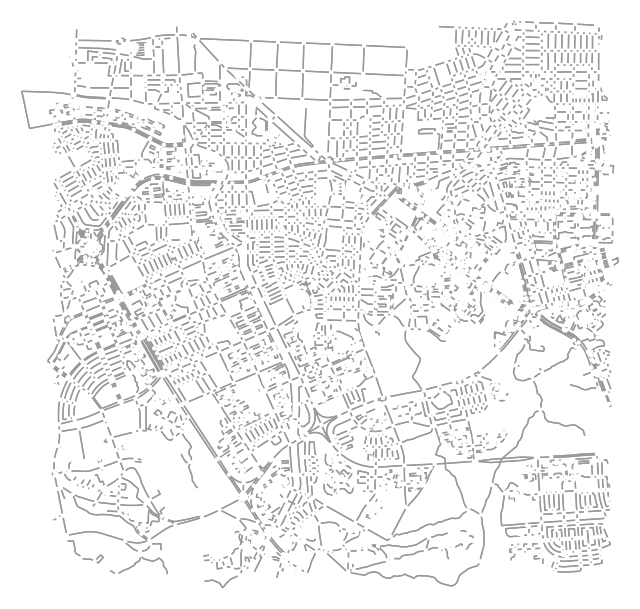

In [ ]:
# Ï∂úÎ∞úÏßÄ Î∞è Î™©Ï†ÅÏßÄ Ï¢åÌëú ÏÑ§Ï†ï
origin = (36.6256453, 127.4314837)        # Ï≤≠Ï£º ÏãúÏô∏Î≤ÑÏä§ÌÑ∞ÎØ∏ÎÑê
destination = (36.6246818, 127.4638686)   # Ï∂©Î∂ÅÎåÄÌïôÍµê Î≥ëÏõê

# Ï§ëÏã¨ Ï¢åÌëú Í≥ÑÏÇ∞ (Ï§ëÍ∞Ñ ÏßÄÏ†ê)
center_lat = (origin[0] + destination[0]) / 2
center_lon = (origin[1] + destination[1]) / 2
center_point = (center_lat, center_lon)

# Î∞òÍ≤Ω 2km ÎèÑÎ°ú ÎÑ§Ìä∏ÏõåÌÅ¨ Î∂àÎü¨Ïò§Í∏∞
radius = 2000  # Î∞òÍ≤Ω 2km
cheongju_graph = ox.graph_from_point(center_point, dist=radius, network_type="walk")

# Ï∂úÎ∞úÏßÄÏôÄ Î™©Ï†ÅÏßÄÏùò Í∞ÄÏû• Í∞ÄÍπåÏö¥ ÎÖ∏Îìú Ï∞æÍ∏∞
origin_node = get_nearest_node(cheongju_graph, *origin)
destination_node = get_nearest_node(cheongju_graph, *destination)

print(f"Ï∂úÎ∞úÏßÄ ÎÖ∏Îìú ID (Ï≤≠Ï£º ÏãúÏô∏Î≤ÑÏä§ÌÑ∞ÎØ∏ÎÑê): {origin_node}")
print(f"Î™©Ï†ÅÏßÄ ÎÖ∏Îìú ID (Ï∂©Î∂ÅÎåÄÌïôÍµê Î≥ëÏõê): {destination_node}")

# ÏãúÍ∞ÅÌôîÎ°ú Î∞òÍ≤Ω ÌôïÏù∏
fig, ax = ox.plot_graph(cheongju_graph, bgcolor='white', node_size=10, edge_linewidth=1)

In [ ]:
## ÎèÑÎ≥¥ Ï†úÏô∏Ìïú ÎÑ§Ìä∏ÏõåÌÅ¨ Graph ÏÉùÏÑ±
# Ï†úÏô∏Ìï† highway Ïú†Ìòï ÏÑ§Ï†ï
excluded_highways = ['footway']

# ÌïÑÌÑ∞ÎßÅÎêú Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
filtered_graph = create_filtered_graph(cheongju_graph, excluded_highways)

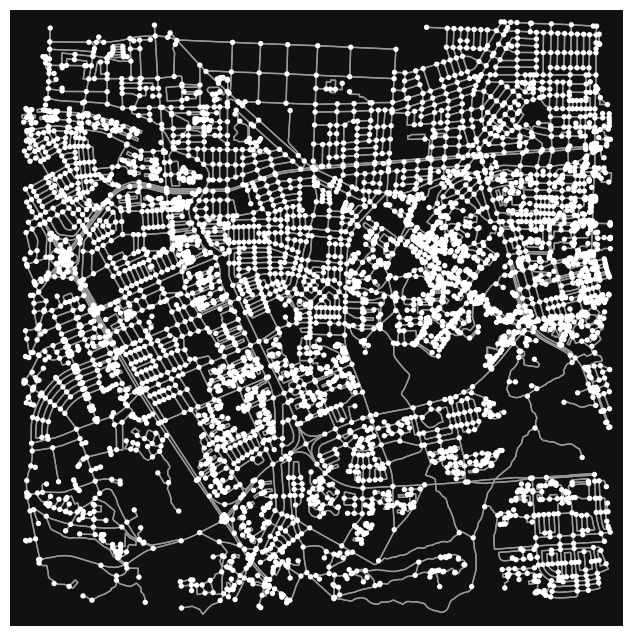

In [ ]:
plot_map_with_node_ids(filtered_graph)

- rxsite ÎÖ∏Îìú ID Î∞òÌôò ÏΩîÎìú

## Ïú†Ìö® ÎÖ∏Îìú (ÍµêÏ∞®Î°ú ÏÇ¨Ïù¥ ÎÖ∏Îìú Ìè¨Ìï® : ÎèÑÎ°úÏÉùÏÑ±ÏùÑ ÏúÑÌï¥ÏÑú)

In [ ]:
pip install openpyxl


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


c:\Users\601_PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\601_PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 47196 (\N{HANGUL SYLLABLE RO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\601_PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 45348 (\N{HANGUL SYLLABLE NE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\601_PC\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\601_PC\AppData\Local\Programs\Python\Python313\Lib\site-packag

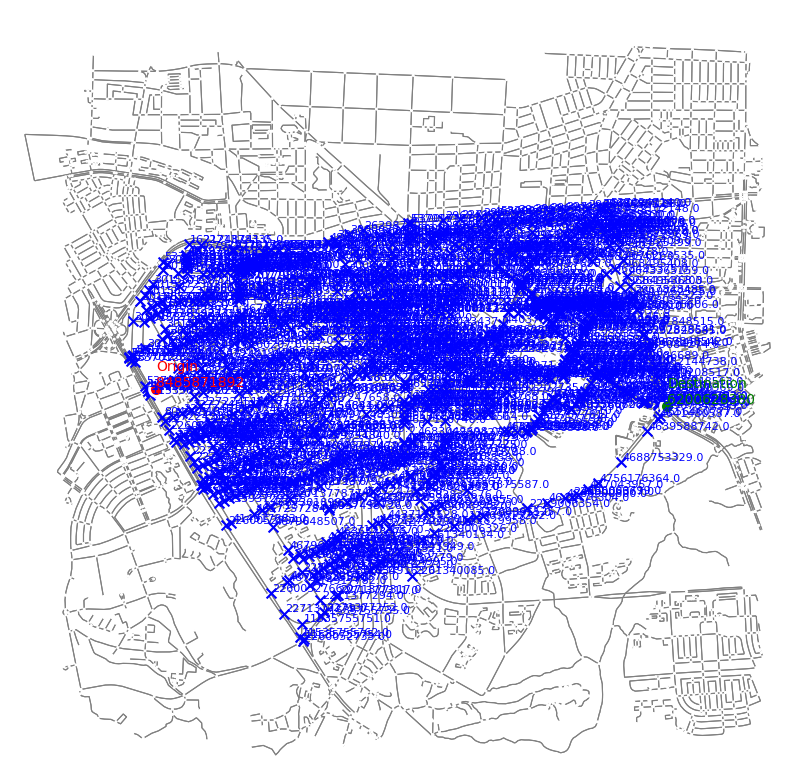

In [ ]:
# Îã®Í≥Ñ 1 : Í∏∞Î≥∏ Ïú†Ìö® ÎÖ∏Îìú ÏßëÌï© ÏÉùÏÑ±
# Rx ÎÖ∏Îìú ID Î∂àÎü¨Ïò§Í∏∞
rx_file_path = 'all_nodes_with_coordinates_throughput.xlsx'
rx_data = pd.read_excel(rx_file_path)
rx_node_ids = rx_data['Node ID'].tolist()

# Ï∂úÎ∞úÏßÄ Î∞è Î™©Ï†ÅÏßÄ Ï¢åÌëú ÏÑ§Ï†ï
origin = (36.6256453, 127.4314837)        # Ï≤≠Ï£º ÏãúÏô∏Î≤ÑÏä§ÌÑ∞ÎØ∏ÎÑê
destination = (36.6246818, 127.4638686)   # Ï∂©Î∂ÅÎåÄÌïôÍµê Î≥ëÏõê

# # OSM Îç∞Ïù¥ÌÑ∞ Î°úÎìú
# cheongju_graph = ox.graph_from_place('Cheongju, South Korea', network_type='drive')

# Ï∂úÎ∞úÏßÄÏôÄ Î™©Ï†ÅÏßÄÏùò Í∞ÄÏû• Í∞ÄÍπåÏö¥ ÎÖ∏Îìú Ï∞æÍ∏∞
origin_node = ox.distance.nearest_nodes(cheongju_graph, origin[1], origin[0])
destination_node = ox.distance.nearest_nodes(cheongju_graph, destination[1], destination[0])

# # Ï∂úÎ∞úÏßÄ, Î™©Ï†ÅÏßÄ, Rx ÎÖ∏Îìú ID Ìï©ÏπòÍ∏∞
# valid_node_ids = set(rx_node_ids + [origin_node, destination_node])

# Rx ÎÖ∏ÎìúÎßå Ìè¨Ìï®Îêú ÎèÖÎ¶Ω Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
rx_graph = nx.Graph()
for _, row in rx_data.iterrows():
    node_id = row['Node ID']
    lat, lon = row['Latitude'], row['Longitude']
    rx_graph.add_node(node_id, x=lon, y=lat)

# Ï∂úÎ∞úÏßÄ, Î™©Ï†ÅÏßÄ, Rx ÎÖ∏ÎìúÎßå Ìè¨Ìï®ÌïòÎäî ÌïÑÌÑ∞ÎßÅÎêú Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
node_filtered_graph = cheongju_graph.subgraph(rx_node_ids).copy()

# Ïú†Ìö® ÎÖ∏ÎìúÎì§Î°ú Íµ¨ÏÑ±Îêú ÎèÑÎ°ú Ï∞æÍ∏∞
valid_edges = []
for u, v, data in node_filtered_graph.edges(data=True):
    if u in rx_node_ids and v in rx_node_ids:  # Rx ÎÖ∏Îìú Í∞Ñ Ïó∞Í≤∞Îßå Ìè¨Ìï®
        valid_edges.append((u, v))

# Ïú†Ìö® ÎÖ∏ÎìúÏôÄ ÎèÑÎ°ú ÏãúÍ∞ÅÌôî Í∞úÏÑ†
valid_graph = nx.Graph()
valid_graph.add_edges_from(valid_edges)
valid_graph.add_nodes_from(rx_node_ids)

# Îπ†Î•∏ ÏãúÍ∞ÅÌôî Ìï®Ïàò
def plot_fast_graph(G, rx_graph, origin_node, destination_node):
    fig, ax = plt.subplots(figsize=(10,10))
    ox.plot_graph(G, ax=ax, node_size=5, node_color='white', edge_color='gray', edge_linewidth=0.8, show=False, close=False, bgcolor='black')

    # Rx ÎÖ∏Îìú ÏãúÍ∞ÅÌôî
    for node in rx_graph.nodes:
        x, y = rx_graph.nodes[node]['x'], rx_graph.nodes[node]['y']
        ax.scatter(x, y, c='blue', s=50, marker='x')
        ax.text(x + 0.0001, y + 0.0001, str(node), fontsize=8, color='blue')

    # Ï∂úÎ∞úÏßÄ ÎÖ∏Îìú ÌëúÏãú
    x, y = G.nodes[origin_node]['x'], G.nodes[origin_node]['y']
    ax.scatter(x, y, c='red', s=100, label='Origin', marker='o', edgecolors='white', linewidths=2)
    ax.text(x, y, f'Origin\n{origin_node}', fontsize=10, color='red', ha='left', va='bottom')

    # Î™©Ï†ÅÏßÄ ÎÖ∏Îìú ÌëúÏãú
    x, y = G.nodes[destination_node]['x'], G.nodes[destination_node]['y']
    ax.scatter(x, y, c='green', s=100, label='Destination', marker='o', edgecolors='white', linewidths=2)
    ax.text(x, y, f'Destination\n{destination_node}', fontsize=10, color='green', ha='left', va='bottom')

    plt.title("ÎèÑÎ°ú ÎÑ§Ìä∏ÏõåÌÅ¨ÏôÄ Rx ÎÖ∏Îìú ÏãúÍ∞ÅÌôî (OSMnx + Matplotlib)", color='white', fontsize=14)
    plt.show()

# ÏãúÍ∞ÅÌôî Ïã§Ìñâ
plot_fast_graph(cheongju_graph, rx_graph, origin_node, destination_node)


In [ ]:
# Ï∂úÎ∞úÏßÄÏôÄ ÎèÑÏ∞©ÏßÄÎ•º Î≥ÑÎèÑÎ°ú Í¥ÄÎ¶¨
origin_destination_ids = {origin_node, destination_node}

# Rx ÎÖ∏Îìú (rx_graph ÎÖ∏Îìú) ÏßëÌï©Ìôî
rx_only_node_ids = set(rx_graph.nodes)

# Ï†ÑÏ≤¥ Ïú†Ìö® ÎÖ∏Îìú
valid_node_ids = rx_only_node_ids | origin_destination_ids  # Ìï©ÏßëÌï©

# Ï∂úÎ†•
print(f"‚úÖ Rx ÎÖ∏Îìú Ïàò: {len(rx_only_node_ids)}Í∞ú")
print(f"‚úÖ Ï∂úÎ∞úÏßÄ, ÎèÑÏ∞©ÏßÄ ÎÖ∏Îìú Ïàò: {len(origin_destination_ids)}Í∞ú")
print(f"‚úÖ Ï†ÑÏ≤¥ Ïú†Ìö® ÎÖ∏Îìú Ïàò (Rx + Ï∂úÎ∞úÏßÄ/ÎèÑÏ∞©ÏßÄ): {len(valid_node_ids)}Í∞ú")


‚úÖ Rx ÎÖ∏Îìú Ïàò: 970Í∞ú
‚úÖ Ï∂úÎ∞úÏßÄ, ÎèÑÏ∞©ÏßÄ ÎÖ∏Îìú Ïàò: 2Í∞ú
‚úÖ Ï†ÑÏ≤¥ Ïú†Ìö® ÎÖ∏Îìú Ïàò (Rx + Ï∂úÎ∞úÏßÄ/ÎèÑÏ∞©ÏßÄ): 970Í∞ú


In [ ]:
def save_only_rx_nodes_with_coordinates(rx_graph, output_path):
    """
    Rx ÎÖ∏ÎìúÎßå Node ID + ÏúÑÎèÑ(latitude) + Í≤ΩÎèÑ(longitude)Î•º ÏóëÏÖÄÎ°ú Ï†ÄÏû•ÌïòÎäî Ìï®Ïàò
    (Ï∂úÎ∞úÏßÄ/ÎèÑÏ∞©ÏßÄ ÎÖ∏ÎìúÎäî Ï†ÄÏû•ÌïòÏßÄ ÏïäÏùå)
    """
    records = []

    # Rx ÎÖ∏ÎìúÎßå Ï†ÄÏû• (rx_graph Í∏∞Ï§Ä)
    for node in rx_graph.nodes:
        x = rx_graph.nodes[node].get('x', None)
        y = rx_graph.nodes[node].get('y', None)
        if x is not None and y is not None:
            records.append({'Node ID': node, 'latitude': y, 'longitude': x})

    # Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Î≥ÄÌôò Î∞è ÏóëÏÖÄ Ï†ÄÏû•
    df = pd.DataFrame(records)
    df.to_excel(output_path, index=False)
    print(f"‚úÖ Ï¥ù {len(records)}Í∞ú Rx ÎÖ∏ÎìúÎ•º '{output_path}'Ïóê Ï†ÄÏû•ÌñàÏäµÎãàÎã§.")

In [ ]:
# Ï†ÄÏû• (Ï∂úÎ∞úÏßÄ,Î™©Ï†ÅÏßÄ Ï¥ù 2Í∞úÏùò ÎÖ∏ÎìúÎäî Ï†úÏô∏)
save_only_rx_nodes_with_coordinates(
    rx_graph=rx_graph,
    output_path='only_rx_nodes_with_coordinates.xlsx'
)


‚úÖ Ï¥ù 970Í∞ú Rx ÎÖ∏ÎìúÎ•º 'only_rx_nodes_with_coordinates.xlsx'Ïóê Ï†ÄÏû•ÌñàÏäµÎãàÎã§.


In [ ]:
import pandas as pd

# 1. ÏóëÏÖÄ ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
file_path = 'all_nodes_with_coordinates_throughput.xlsx'
rx_data = pd.read_excel(file_path)

# 2. Throughput Ïª¨ÎüºÏùÑ bps ‚Üí MbpsÎ°ú Î≥ÄÌôò
rx_data['Throughput_Mbps'] = rx_data['Throughput'] / 1_000_000

# 3. ÌèâÍ∑† Í≥ÑÏÇ∞ (Mbps Í∏∞Ï§Ä)
average_throughput_mbps = rx_data['Throughput_Mbps'].mean()

# 4. Ï∂úÎ†•
print(f"‚úÖ ÌèâÍ∑† Ï≤òÎ¶¨Ïú® (Mbps): {average_throughput_mbps:.4f} Mbps")


‚úÖ ÌèâÍ∑† Ï≤òÎ¶¨Ïú® (Mbps): 141.9643 Mbps


- Rx ÎÖ∏Îìú ÏÇ¨Ïù¥ ÎèÑÎ°ú ÏãúÍ∞ÅÌôî

In [ ]:

# Ï∂úÎ∞úÏßÄ/ÎèÑÏ∞©ÏßÄ Ï†úÍ±∞Îêú Rx ÎÖ∏ÎìúÎßå Ìè¨Ìï®
valid_node_ids = set(rx_only_node_ids)  # Rx ÎÖ∏ÎìúÎßå

# Ïú†Ìö® ÎÖ∏ÎìúÎì§Î°ú Íµ¨ÏÑ±Îêú ÎèÑÎ°ú Ï∞æÍ∏∞ (Rx ÎÖ∏Îìú Í∞Ñ ÏµúÎã® Í≤ΩÎ°ú Ìè¨Ìï®)
valid_edges = []
for i in range(len(rx_node_ids)):
    for j in range(i + 1, len(rx_node_ids)):
        u, v = rx_node_ids[i], rx_node_ids[j]
        try:
            # Rx ÎÖ∏Îìú Í∞Ñ ÏµúÎã® Í≤ΩÎ°ú Í≥ÑÏÇ∞
            path = nx.shortest_path(cheongju_graph, source=u, target=v, weight='length')

            # Í≤ΩÎ°ú ÏÉÅÏùò Î™®Îì† ÎÖ∏ÎìúÎ•º Ï∂îÍ∞Ä
            for k in range(len(path) - 1):
                valid_edges.append((path[k], path[k+1]))
                valid_node_ids.add(path[k])
                valid_node_ids.add(path[k+1])
        except nx.NetworkXNoPath:
            # Í≤ΩÎ°úÍ∞Ä ÏóÜÎäî Í≤ΩÏö∞ Î¨¥Ïãú
            continue

# Ïú†Ìö® Í∑∏ÎûòÌîÑ Ïû¨Íµ¨ÏÑ±
valid_graph = nx.Graph()
valid_graph.add_edges_from(valid_edges)
valid_graph.add_nodes_from(valid_node_ids)


# # ÏãúÍ∞ÅÌôî Ìï®Ïàò (Rx ÎÖ∏Îìú Í∞Ñ ÎèÑÎ°ú Ìè¨Ìï®)
# def plot_fast_graph(G, rx_graph, origin_node, destination_node):
#     fig, ax = plt.subplots(figsize=(12, 12))
#     ox.plot_graph(G, ax=ax, node_size=5, node_color='white', edge_color='gray', edge_linewidth=0.8, show=False, close=False, bgcolor='black')

#     # Rx ÎÖ∏Îìú ÏãúÍ∞ÅÌôî
#     for node in rx_graph.nodes:
#         x, y = rx_graph.nodes[node]['x'], rx_graph.nodes[node]['y']
#         ax.scatter(x, y, c='blue', s=50, marker='x')
#         ax.text(x + 0.0001, y + 0.0001, str(node), fontsize=8, color='blue')

#     # Ï∂úÎ∞úÏßÄ ÎÖ∏Îìú ÌëúÏãú
#     x, y = G.nodes[origin_node]['x'], G.nodes[origin_node]['y']
#     ax.scatter(x, y, c='red', s=100, label='Origin', marker='o', edgecolors='white', linewidths=2)
#     ax.text(x, y, f'Origin\n{origin_node}', fontsize=10, color='red', ha='left', va='bottom')

#     # Î™©Ï†ÅÏßÄ ÎÖ∏Îìú ÌëúÏãú
#     x, y = G.nodes[destination_node]['x'], G.nodes[destination_node]['y']
#     ax.scatter(x, y, c='green', s=100, label='Destination', marker='o', edgecolors='white', linewidths=2)
#     ax.text(x, y, f'Destination\n{destination_node}', fontsize=10, color='green', ha='left', va='bottom')

#     # Rx ÎÖ∏Îìú ÏÇ¨Ïù¥ ÎèÑÎ°ú ÏãúÍ∞ÅÌôî
#     for u, v in valid_edges:
#         x1, y1 = G.nodes[u]['x'], G.nodes[u]['y']
#         x2, y2 = G.nodes[v]['x'], G.nodes[v]['y']
#         ax.plot([x1, x2], [y1, y2], color='blue', linewidth=2)

#     plt.title("ÎèÑÎ°ú ÎÑ§Ìä∏ÏõåÌÅ¨ÏôÄ Rx ÎÖ∏Îìú Ïó∞Í≤∞ Í≤ΩÎ°ú ÏãúÍ∞ÅÌôî", color='white', fontsize=14)
#     plt.show()

# # ÏãúÍ∞ÅÌôî Ïã§Ìñâ
# plot_fast_graph(cheongju_graph, rx_graph, origin_node, destination_node)


- Í∞ÑÏÑ†Ïù¥ Ïú†Ìö®ÎÖ∏ÎìúÎ•º ÏûáÍ≥† ÏûàÎäîÏßÄ ÌôïÏù∏

In [ ]:
def verify_filtered_edges_connection(filtered_edges, valid_node_ids):
    """
    filtered_edges: ÌïÑÌÑ∞ÎßÅÎêú trunk Í∞ÑÏÑ† Î¶¨Ïä§Ìä∏
    valid_node_ids: Ïó∞Í≤∞Ïù¥ Ïûò ÎêòÏñ¥Ïïº ÌïòÎäî Ïú†Ìö® ÎÖ∏Îìú Î¶¨Ïä§Ìä∏/ÏßëÌï©
    """
    # 1. ÌïÑÌÑ∞ÎßÅÎêú Í∞ÑÏÑ†ÏúºÎ°ú Í∑∏ÎûòÌîÑ ÏÉùÏÑ±
    G_check = nx.Graph()
    G_check.add_edges_from(filtered_edges)

    # 2. Ïó∞Í≤∞ Ïª¥Ìè¨ÎÑåÌä∏ Ï∞æÍ∏∞
    components = list(nx.connected_components(G_check))

    # 3. Ïú†Ìö® ÎÖ∏ÎìúÎì§Ïù¥ Í∞ôÏùÄ Ïª¥Ìè¨ÎÑåÌä∏Ïóê ÏûàÎäîÏßÄ ÌôïÏù∏
    for comp in components:
        if set(valid_node_ids).issubset(comp):
            print(f"‚úÖ Î™®Îì† {len(valid_node_ids)}Í∞úÏùò Ïú†Ìö® ÎÖ∏ÎìúÍ∞Ä ÌïòÎÇòÏùò Ïó∞Í≤∞ Ïª¥Ìè¨ÎÑåÌä∏ ÏïàÏóê ÏûàÏäµÎãàÎã§.")
            return True

    print(f"‚ùå Ïú†Ìö® ÎÖ∏ÎìúÎì§Ïù¥ ÌïòÎÇòÏùò Ïó∞Í≤∞ Ïª¥Ìè¨ÎÑåÌä∏Ïóê ÏûàÏßÄ ÏïäÏäµÎãàÎã§.")
    return False

In [ ]:
# ÏòàÏãú
verify_filtered_edges_connection(valid_edges, rx_node_ids)


‚úÖ Î™®Îì† 970Í∞úÏùò Ïú†Ìö® ÎÖ∏ÎìúÍ∞Ä ÌïòÎÇòÏùò Ïó∞Í≤∞ Ïª¥Ìè¨ÎÑåÌä∏ ÏïàÏóê ÏûàÏäµÎãàÎã§.


True

### Throughput Îß§Ïπ≠
- thpt dataset Î∂àÎü¨Ïò§Í∏∞

In [ ]:
# ÏóëÏÖÄ comm data(throughput) Î∂àÎü¨Ïò§Í∏∞
throughput_excel = pd.read_excel('all_nodes_with_coordinates_throughput.xlsx')

# throughput Ï†ïÎ≥¥Î•º ÎÖ∏ÎìúÏóê Îß§Ìïë
G_set_node = map_throughput_to_nodes(valid_graph, throughput_excel)

- mapping ÌôïÏù∏

In [ ]:
def print_throughput_of_valid_nodes(G, rx_node_ids):
    """
    G: throughputÏù¥ Îß§ÌïëÎêú Í∑∏ÎûòÌîÑ (G_set_node)
    rx_node_ids: Rx Ïú†Ìö® ÎÖ∏Îìú Î¶¨Ïä§Ìä∏ ÎòêÎäî ÏßëÌï©
    Ïú†Ìö® ÎÖ∏ÎìúÎì§Ïùò Ï≤òÎ¶¨Ïú®(throughput) Í∞íÏùÑ Ï∂úÎ†•ÌïòÎäî Ìï®Ïàò
    """
    count_found = 0
    count_missing = 0

    for node in rx_node_ids:
        if node in G.nodes:
            throughput = G.nodes[node].get('throughput', None)
            if throughput is not None:
                print(f"Node {node}: throughput = {throughput}")
                count_found += 1
            else:
                print(f"‚ùå Node {node}: throughput Ï†ïÎ≥¥ ÏóÜÏùå")
                count_missing += 1
        else:
            print(f"‚ùå Node {node}: Í∑∏ÎûòÌîÑÏóê Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏùå")
            count_missing += 1

    print(f"\n‚úÖ Ï≤òÎ¶¨Ïú® Ï†ïÎ≥¥ ÏûàÎäî ÎÖ∏Îìú Ïàò: {count_found}Í∞ú")
    print(f"‚ùå Ï≤òÎ¶¨Ïú® Ï†ïÎ≥¥ ÏóÜÎäî ÎÖ∏Îìú Ïàò: {count_missing}Í∞ú")


In [ ]:
print_throughput_of_valid_nodes(G_set_node, rx_node_ids)

Node 3015872343: throughput = 94.8019175459969
Node 4656035229: throughput = 95.53740928833508
Node 3000023775: throughput = 99.0292159901008
Node 4636543383: throughput = 99.05519831471653
Node 4679744568: throughput = 101.6534742301377
Node 3000023509: throughput = 102.41578470307306
Node 4636543376: throughput = 103.00079413626591
Node 4656937191: throughput = 103.14329664222741
Node 4657017758: throughput = 103.17435721096385
Node 3000023440: throughput = 103.34613959495162
Node 3015872375: throughput = 103.92013283245082
Node 3015872364: throughput = 105.03445360054079
Node 3000023812: throughput = 105.21386883968682
Node 2968495409: throughput = 105.42707928019547
Node 4679744909: throughput = 106.67281533552021
Node 2272245054: throughput = 107.03871494229352
Node 3000023442: throughput = 107.36626968222517
Node 3000023511: throughput = 109.21881981522924
Node 4683067432: throughput = 109.8904544727807
Node 4636543387: throughput = 110.20821778822905
Node 4679754838: throughput 

In [ ]:
# # Ï∂úÎ∞ú ÎÖ∏ÎìúÏôÄ ÎèÑÏ∞© ÎÖ∏Îìú ÏßÄÏ†ï
# # (origin_node, destination_nodeÎäî ÌååÏùº ÏïàÏóê Ïù¥ÎØ∏ ÏûàÏùå)

# # Ï≤òÎ¶¨Ïú® Í∏∞Î∞ò ÏµúÏ†Å Í≤ΩÎ°ú Ï∞æÍ∏∞
# throughput_based_path = nx.shortest_path(G_set_node, source=origin_node, target=destination_node, weight='new_weight', method="dijkstra")

# print("üöÄ Ï≤òÎ¶¨Ïú® Í∏∞Î∞ò Í≤ΩÎ°ú:", throughput_based_path)
# 2. ÎπÑÏú®Î≥Ñ Í≤ΩÎ°ú ÌÉêÏÉâ Ìï®Ïàò
def find_path_for_ratios(G, ratios, source, target):
    """
    G: Í∑∏ÎûòÌîÑ
    ratios: Í±∞Î¶¨:Ï≤òÎ¶¨Ïú® ÎπÑÏú® Î¶¨Ïä§Ìä∏
    source: Ï∂úÎ∞ú ÎÖ∏Îìú
    target: ÎèÑÏ∞© ÎÖ∏Îìú
    """
    paths = {}
    for ratio in ratios:
        # Í∑∏ÎûòÌîÑ Î≥µÏÇ¨Ìï¥ÏÑú Îß§Î≤à freshÌïòÍ≤å Í∞ÄÏ§ëÏπò ÏÑ§Ï†ï
        G_temp = G.copy()
        G_temp = set_edge_weights_based_on_ratio(G_temp, ratio)

        try:
            path = nx.shortest_path(G_temp, source=source, target=target, weight='weight', method='dijkstra')
            paths[ratio] = path
            print(f"\nüöÄ Í±∞Î¶¨:Ï≤òÎ¶¨Ïú® ÎπÑÏú® {ratio:.1f}:{1-ratio:.1f} Í≤ΩÎ°ú:")
            print(path)
        except nx.NetworkXNoPath:
            print(f"\n‚ùå Í±∞Î¶¨:Ï≤òÎ¶¨Ïú® ÎπÑÏú® {ratio:.1f}:{1-ratio:.1f} - Í≤ΩÎ°úÎ•º Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

    return paths

# 3. Ïã§Ìñâ
ratios = [0, 0.3, 0.6, 1.0]  # Í±∞Î¶¨:Ï≤òÎ¶¨Ïú® ÎπÑÏú®
paths_result = find_path_for_ratios(G_set_node, ratios, origin_node, destination_node)



üöÄ Í±∞Î¶¨:Ï≤òÎ¶¨Ïú® ÎπÑÏú® 0.0:1.0 Í≤ΩÎ°ú:
[8485871892, 11535631438, 11535631437, 4657179295, 5370128281, 3015872402, 2272245177, 3791819479, 1621248629, 2271378269, 4679763988, 4657247656, 2260052923, 2918310206, 1806881875, 2260052845, 3957495727, 4670424839, 4670424837, 4670424838, 2269006369, 4682813858, 3957495728, 4657375587, 437043951, 12609615257, 2269006354, 4641476304, 4866000800, 2269006367, 4866000799, 437043957, 4756176364, 4688753329, 4639588742, 4641480587, 4656460777, 2967848549, 3958352335, 6200628380]

üöÄ Í±∞Î¶¨:Ï≤òÎ¶¨Ïú® ÎπÑÏú® 0.3:0.7 Í≤ΩÎ°ú:
[8485871892, 11535631438, 11535631437, 4657179295, 5370128281, 3015872402, 2272245177, 3791819479, 1621248629, 2271378269, 4679763988, 4657247656, 2260052923, 2918310206, 1806881875, 2260052845, 3957495727, 4670424839, 4670424837, 4670424838, 2269006369, 4682813858, 3957495728, 4657375587, 437043951, 12609615257, 2269006354, 4641476304, 4866000800, 2269006367, 4866000799, 437043957, 4756176364, 4688753329, 4639588742, 4641

In [ ]:
# 1. Rx ÎÖ∏Îìú Ï¢åÌëú Î∂àÎü¨Ïò§Í∏∞
rx_coord_df = pd.read_excel('only_rx_nodes_with_coordinates.xlsx')
rx_coord_dict = {
    int(row['Node ID']): (row['longitude'], row['latitude'])
    for _, row in rx_coord_df.iterrows()
}

# 2. ÎÖ∏Îìú Ï¢åÌëú Ï∞æÎäî Ìï®Ïàò
def get_node_coordinates(node_id, rx_coord_dict, backup_graph):
    """
    - node_id: Ï∞æÏùÑ ÎÖ∏Îìú ID
    - rx_coord_dict: Rx ÎÖ∏Îìú Ï¢åÌëú ÎîïÏÖîÎÑàÎ¶¨
    - backup_graph: Ï¢åÌëúÍ∞Ä ÏóÜÏùÑ Îïå Ï∞∏Í≥†Ìï† Í∑∏ÎûòÌîÑ (cheongju_graph)

    Î∞òÌôò: (x, y) ÌäúÌîå
    """
    if node_id in rx_coord_dict:
        return rx_coord_dict[node_id]
    elif node_id in backup_graph.nodes:
        node_data = backup_graph.nodes[node_id]
        return (node_data.get('x', None), node_data.get('y', None))
    else:
        print(f"‚ùå ÎÖ∏Îìú {node_id}Ïóê ÎåÄÌïú Ï¢åÌëúÎ•º Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")
        return (None, None)

# foliumÏúºÎ°ú Í≤ΩÎ°úÎ•º ÏßÄÎèÑÏóê Í∑∏Î¶¨Îäî Ìï®Ïàò
def plot_path_on_real_map(path, rx_coord_dict, backup_graph, origin_node, destination_node, title="Throughput Í∏∞Î∞ò Í≤ΩÎ°ú Ïã§ÏßÄÎèÑ ÏãúÍ∞ÅÌôî"):
    """
    - path: Í≤ΩÎ°úÏóê Ìè¨Ìï®Îêú ÎÖ∏Îìú Î¶¨Ïä§Ìä∏
    - rx_coord_dict: Rx ÎÖ∏Îìú Ï¢åÌëú
    - backup_graph: Ï§ëÍ∞Ñ ÎÖ∏Îìú Ï¢åÌëú (cheongju_graph)
    - origin_node: Ï∂úÎ∞ú ÎÖ∏Îìú ID
    - destination_node: ÎèÑÏ∞© ÎÖ∏Îìú ID
    - title: ÏßÄÎèÑ Ï†úÎ™©
    """
    # Ï∂úÎ∞úÏßÄ Ï¢åÌëúÎ°ú ÏßÄÎèÑ Ï§ëÏã¨
    start_lon, start_lat = get_node_coordinates(origin_node, rx_coord_dict, backup_graph)
    m = folium.Map(location=[start_lat, start_lon], zoom_start=15)

    # Í≤ΩÎ°ú ÎßåÎì§Í∏∞
    path_coordinates = []
    for node_id in path:
        lon, lat = get_node_coordinates(node_id, rx_coord_dict, backup_graph)
        if None not in (lon, lat):
            path_coordinates.append((lat, lon))  # foliumÏùÄ (ÏúÑÎèÑ, Í≤ΩÎèÑ)

    # Í≤ΩÎ°ú Ìè¥Î¶¨ÎùºÏù∏ Ï∂îÍ∞Ä
    folium.PolyLine(
        locations=path_coordinates,
        color='red',
        weight=5,
        opacity=0.8,
        popup=title
    ).add_to(m)

    # Ï∂úÎ∞úÏßÄ ÎßàÏª§
    start_coords = get_node_coordinates(origin_node, rx_coord_dict, backup_graph)
    folium.Marker(
        location=(start_coords[1], start_coords[0]),
        popup="Origin",
        icon=folium.Icon(color='red', icon='play')
    ).add_to(m)

    # ÎèÑÏ∞©ÏßÄ ÎßàÏª§
    end_coords = get_node_coordinates(destination_node, rx_coord_dict, backup_graph)
    folium.Marker(
        location=(end_coords[1], end_coords[0]),
        popup="Destination",
        icon=folium.Icon(color='green', icon='flag')
    ).add_to(m)

    return m



In [ ]:
# ÎπÑÏú® Î¶¨Ïä§Ìä∏
ratios = [0.0, 0.2, 0.8, 1.0]

# ÎπÑÏú®Î≥Ñ folium ÏßÄÎèÑ ÏÉùÏÑ±
maps = {}

for ratio in ratios:
    path = paths_result.get(ratio)
    if path is not None:
        title = f"Throughput Í∏∞Î∞ò ÏµúÏ†Å Í≤ΩÎ°ú Ïã§ÏßÄÎèÑ ÏãúÍ∞ÅÌôî (ÎπÑÏú® {ratio:.1f}:{1-ratio:.1f})"
        folium_map = plot_path_on_real_map(
            path=path,
            rx_coord_dict=rx_coord_dict,
            backup_graph=cheongju_graph,
            origin_node=origin_node,
            destination_node=destination_node,
            title=title
        )
        maps[ratio] = folium_map


In [ ]:
maps[0.0]

In [ ]:
maps[0.3]

In [ ]:
maps[0.6]

In [ ]:
maps[1.0]

In [ ]:
!pip install haversine


[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from haversine import haversine
from datetime import time

def calculate_distance(u, v, rx_coord_dict, backup_graph):
    lon1, lat1 = get_node_coordinates(u, rx_coord_dict, backup_graph)
    lon2, lat2 = get_node_coordinates(v, rx_coord_dict, backup_graph)

    if None not in (lon1, lat1, lon2, lat2):
        distance_km = haversine((lat1, lon1), (lat2, lon2))
        return distance_km * 1000  # meter Î≥ÄÌôò
    else:
        return float('inf')

def determine_base_speed(current_time):
    """
    ÏãúÍ∞ÑÎåÄÏóê Îî∞Îùº Í∏∞Î≥∏ ÏÜçÎèÑ Î∞òÌôò
    (‚Äª Ï†ïÏ≤¥Í≥ÑÏàò Î¨¥Ïãú, Ïã†Ìò∏ÎåÄÍ∏∞ Î¨¥Ïãú)
    """
    hour = current_time.hour

    if 7 <= hour < 9:  # Ï∂úÍ∑ºÏãúÍ∞Ñ
        return 20  # km/h
    elif 10 <= hour < 16:  # ÎÇÆ ÏãúÍ∞Ñ
        return 25
    elif 17 <= hour < 19:  # Ìá¥Í∑ºÏãúÍ∞Ñ
        return 20
    else:  # ÏïºÍ∞Ñ Îì±
        return 30

def estimate_travel_time_simple(total_distance_meters, current_time):
    """
    Í±∞Î¶¨ÏôÄ ÏãúÍ∞ÑÎåÄÏóê Îî∞Îùº Îã®Ïàú ÏÜåÏöîÏãúÍ∞Ñ Í≥ÑÏÇ∞
    (‚Äª Í∏∞Î≥∏ ÏÜçÎèÑÎßå Ï†ÅÏö©, Ï†ïÏ≤¥Í≥ÑÏàò Î∞è Ïã†Ìò∏ÎåÄÍ∏∞ Î¨¥Ïãú)
    """
    base_speed = determine_base_speed(current_time)
    speed_mps = base_speed * 1000 / 3600  # km/h ‚Üí m/s Î≥ÄÌôò

    move_time_seconds = total_distance_meters / speed_mps
    move_time_minutes = move_time_seconds / 60

    return move_time_seconds, move_time_minutes, base_speed

def summarize_single_path_for_time(G, path, ratio_label, current_time, time_label):
    num_nodes = len(path)
    total_distance = 0
    throughput_list = []

    for i in range(len(path) - 1):
        u, v = path[i], path[i+1]

        if G.has_edge(u, v):
            edge_data = G[u][v]
            distance = edge_data.get('length', None)

            if distance is None:
                distance = calculate_distance(u, v, rx_coord_dict, cheongju_graph)

            throughput_u = G.nodes[u].get('throughput', 0)
            throughput_v = G.nodes[v].get('throughput', 0)
            avg_throughput = (throughput_u + throughput_v) / 2

            total_distance += distance
            throughput_list.append(avg_throughput)

    if throughput_list:
        avg_throughput = sum(throughput_list) / len(throughput_list)
        min_throughput = min(throughput_list)
        max_throughput = max(throughput_list)
    else:
        avg_throughput = min_throughput = max_throughput = 0

    # ÏÜåÏöîÏãúÍ∞Ñ Í≥ÑÏÇ∞ (Í∏∞Î≥∏ ÏÜçÎèÑÎßå)
    time_sec, time_min, base_speed = estimate_travel_time_simple(
        total_distance,
        current_time=current_time
    )

    # Ï∂úÎ†•
    print(f"\nüïë [{time_label}] ÎπÑÏú® {ratio_label} Í≤ΩÎ°ú:")
    print(path)
    print(f" - ÎÖ∏Îìú Ïàò: {num_nodes}")
    print(f" - Ï¥ù Í±∞Î¶¨: {total_distance:.2f} m")
    print(f" - Í∏∞Î≥∏ ÏÜçÎèÑ: {base_speed} km/h")
    print(f" - ÏÜåÏöî ÏãúÍ∞Ñ: {time_sec:.1f}Ï¥à ‚âà {time_min:.1f}Î∂Ñ")
    print(f" - ÌèâÍ∑† Ï≤òÎ¶¨Ïú®: {avg_throughput:.2f}")
    print(f" - ÏµúÏÜå Ï≤òÎ¶¨Ïú®: {min_throughput:.2f}")
    print(f" - ÏµúÎåÄ Ï≤òÎ¶¨Ïú®: {max_throughput:.2f}")

# 3Í∞ú ÏãúÍ∞ÑÎåÄ ÏÑ§Ï†ï
time_periods = {
    "Ïò§Ï†Ñ(08:00)": time(8, 0),
    "Ïò§ÌõÑ(14:00)": time(14, 0),
    "Ï†ÄÎÖÅ(18:00)": time(18, 0)
}



# 4Í∞ú ÎπÑÏú® Î™®Îëê ÏàúÏ∞® Ï∂úÎ†•
for time_label, time_value in time_periods.items():
    for ratio in [0.0, 0.3, 0.6, 1.0]:
        path = paths_result.get(ratio)
        if path:
            summarize_single_path_for_time(G_set_node, path, f"{ratio:.1f}:{1-ratio:.1f}", time_value, time_label)



üïë [Ïò§Ï†Ñ(08:00)] ÎπÑÏú® 0.0:1.0 Í≤ΩÎ°ú:
[8485871892, 11535631438, 11535631437, 4657179295, 5370128281, 3015872402, 2272245177, 3791819479, 1621248629, 2271378269, 4679763988, 4657247656, 2260052923, 2918310206, 1806881875, 2260052845, 3957495727, 4670424839, 4670424837, 4670424838, 2269006369, 4682813858, 3957495728, 4657375587, 437043951, 12609615257, 2269006354, 4641476304, 4866000800, 2269006367, 4866000799, 437043957, 4756176364, 4688753329, 4639588742, 4641480587, 4656460777, 2967848549, 3958352335, 6200628380]
 - ÎÖ∏Îìú Ïàò: 40
 - Ï¥ù Í±∞Î¶¨: 4238.34 m
 - Í∏∞Î≥∏ ÏÜçÎèÑ: 20 km/h
 - ÏÜåÏöî ÏãúÍ∞Ñ: 762.9Ï¥à ‚âà 12.7Î∂Ñ
 - ÌèâÍ∑† Ï≤òÎ¶¨Ïú®: 143.21
 - ÏµúÏÜå Ï≤òÎ¶¨Ïú®: 143.01
 - ÏµúÎåÄ Ï≤òÎ¶¨Ïú®: 143.84

üïë [Ïò§Ï†Ñ(08:00)] ÎπÑÏú® 0.3:0.7 Í≤ΩÎ°ú:
[8485871892, 11535631438, 11535631437, 4657179295, 5370128281, 3015872402, 2272245177, 3791819479, 1621248629, 2271378269, 4679763988, 4657247656, 2260052923, 2918310206, 1806881875, 2260052845, 3957495727, 4670424839, 4670424837, 46704

In [ ]:
!pip install tabulate

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd

summary_list = []

for time_label, time_value in time_periods.items():
    for ratio in [0.0, 0.3, 0.6, 1.0]:
        path = paths_result.get(ratio)
        if path:
            num_nodes = len(path)
            total_distance = 0
            throughput_list = []

            for i in range(len(path) - 1):
                u, v = path[i], path[i+1]

                if G_set_node.has_edge(u, v):
                    edge_data = G_set_node[u][v]
                    distance = edge_data.get('length', None)

                    if distance is None:
                        distance = calculate_distance(u, v, rx_coord_dict, cheongju_graph)

                    throughput_u = G_set_node.nodes[u].get('throughput', 0)
                    throughput_v = G_set_node.nodes[v].get('throughput', 0)
                    avg_throughput = (throughput_u + throughput_v) / 2

                    total_distance += distance
                    throughput_list.append(avg_throughput)

            if throughput_list:
                avg_throughput = sum(throughput_list) / len(throughput_list)
                min_throughput = min(throughput_list)
                max_throughput = max(throughput_list)
            else:
                avg_throughput = min_throughput = max_throughput = 0

            time_sec, time_min, base_speed = estimate_travel_time_simple(
                total_distance,
                current_time=time_value
            )

            summary_list.append({
                "ÏãúÍ∞ÑÎåÄ": time_label,
                "ÎπÑÏú®": f"{ratio:.1f}:{1-ratio:.1f}",
                "ÎÖ∏Îìú Ïàò": num_nodes,
                "Í±∞Î¶¨(m)": round(total_distance, 2),
                "Í∏∞Î≥∏ ÏÜçÎèÑ(km/h)": base_speed,
                "ÏÜåÏöî ÏãúÍ∞Ñ(Ï¥à)": round(time_sec, 1),
                "ÏÜåÏöî ÏãúÍ∞Ñ(Î∂Ñ)": round(time_min, 1),
                "ÌèâÍ∑† Ï≤òÎ¶¨Ïú®": round(avg_throughput, 2),
                "ÏµúÏÜå Ï≤òÎ¶¨Ïú®": round(min_throughput, 2),
                "ÏµúÎåÄ Ï≤òÎ¶¨Ïú®": round(max_throughput, 2)
            })

# # Ïä§ÌÉÄÏùº Ï†ÅÏö© Ï†Ñ ÏÑ§Ï†ï
# pd.set_option('display.unicode.east_asian_width', True)

# # ÏãúÍ∞ÑÎåÄÎ≥ÑÎ°ú Íµ¨ÌöçÏùÑ ÎÇòÎà†ÏÑú Ï†ïÎ†¨ Ï∂úÎ†•
# for time_label, group_df in df_summary.groupby("ÏãúÍ∞ÑÎåÄ"):
#     print(f"\nüìå {time_label} ÏãúÍ∞ÑÎåÄ Í≤ΩÎ°ú ÏöîÏïΩ")
#     print(group_df.to_string(index=False))

from tabulate import tabulate

for time_label, group_df in df_summary.groupby("ÏãúÍ∞ÑÎåÄ"):
    print(f"\nüìå {time_label} ÏãúÍ∞ÑÎåÄ Í≤ΩÎ°ú ÏöîÏïΩ")
    print(tabulate(group_df, headers='keys', tablefmt='grid', showindex=False))


# DataFrameÏúºÎ°ú Ï∂úÎ†•
df_summary = pd.DataFrame(summary_list)
print(df_summary)



üìå Ïò§Ï†Ñ(08:00) ÏãúÍ∞ÑÎåÄ Í≤ΩÎ°ú ÏöîÏïΩ
+-------------+---------+-----------+-----------+-------------------+-----------------+-----------------+---------------+---------------+---------------+
| ÏãúÍ∞ÑÎåÄ      | ÎπÑÏú®    |   ÎÖ∏Îìú Ïàò |   Í±∞Î¶¨(m) |   Í∏∞Î≥∏ ÏÜçÎèÑ(km/h) |   ÏÜåÏöî ÏãúÍ∞Ñ(Ï¥à) |   ÏÜåÏöî ÏãúÍ∞Ñ(Î∂Ñ) |   ÌèâÍ∑† Ï≤òÎ¶¨Ïú® |   ÏµúÏÜå Ï≤òÎ¶¨Ïú® |   ÏµúÎåÄ Ï≤òÎ¶¨Ïú® |
+=============+=========+===========+===========+===================+=================+=================+===============+===============+===============+
| Ïò§Ï†Ñ(08:00) | 0.0:1.0 |        40 |   4238.34 |                20 |           762.9 |            12.7 |        143.21 |        143.01 |        143.84 |
+-------------+---------+-----------+-----------+-------------------+-----------------+-----------------+---------------+---------------+---------------+
| Ïò§Ï†Ñ(08:00) | 0.3:0.7 |        40 |   4238.34 |                20 |           762.9 |            12.7 |        143.21 |        143.01 |      

In [ ]:
from tabulate import tabulate

with open("Í≤ΩÎ°ú_ÏöîÏïΩ_Í≤∞Í≥º_Ï†ÑÏ≤¥Ï∂úÎ†•.txt", "w", encoding="utf-8") as f:
    for time_label, group_df in df_summary.groupby("ÏãúÍ∞ÑÎåÄ"):
        f.write(f"\nüìå {time_label} ÏãúÍ∞ÑÎåÄ Í≤ΩÎ°ú ÏöîÏïΩ\n")
        f.write(tabulate(group_df, headers="keys", tablefmt="grid", showindex=False))
        f.write("\n\n")


In [ ]:
edge_summary = []

for u, v in G_set_node.edges():
    # Í∏∞Î≥∏ Í±∞Î¶¨ Í∞ÄÏ†∏Ïò§Í∏∞
    edge_data = G_set_node[u][v]
    distance = edge_data.get('length')

    # Í±∞Î¶¨ Ï†ïÎ≥¥Í∞Ä ÏóÜÎäî Í≤ΩÏö∞ haversine ÏàòÎèô Í≥ÑÏÇ∞
    if distance is None:
        # 1. Ïö∞ÏÑ† ÎÖ∏ÎìúÏóê ÏßÅÏ†ë x, y Ï¢åÌëúÍ∞Ä ÏûàÎäîÏßÄ ÌôïÏù∏
        lon1 = G_set_node.nodes[u].get('x')
        lat1 = G_set_node.nodes[u].get('y')
        lon2 = G_set_node.nodes[v].get('x')
        lat2 = G_set_node.nodes[v].get('y')

        # 2. ÏóÜÎã§Î©¥ Î∞±ÏóÖ Ï¢åÌëú ÎîïÏÖîÎÑàÎ¶¨ÏóêÏÑú Ï∞æÍ∏∞
        if None in (lon1, lat1) and rx_coord_dict.get(u):
            lon1, lat1 = rx_coord_dict[u]
        if None in (lon2, lat2) and rx_coord_dict.get(v):
            lon2, lat2 = rx_coord_dict[v]

        # 3. Ï¢åÌëúÍ∞Ä Î™®Îëê ÏûàÎã§Î©¥ Í±∞Î¶¨ Í≥ÑÏÇ∞
        if None not in (lon1, lat1, lon2, lat2):
            distance = haversine((lat1, lon1), (lat2, lon2)) * 1000  # m Îã®ÏúÑ
        else:
            distance = None  # Ï¢åÌëú Î∂ÄÏ°±ÌïòÎ©¥ Ìè¨Í∏∞

    # Ï≤òÎ¶¨Ïú® Ï†ïÎ≥¥
    throughput_u = G_set_node.nodes[u].get('throughput', 0)
    throughput_v = G_set_node.nodes[v].get('throughput', 0)
    avg_throughput = (throughput_u + throughput_v) / 2

    edge_summary.append({
        "Ï∂úÎ∞ú ÎÖ∏Îìú": u,
        "ÎèÑÏ∞© ÎÖ∏Îìú": v,
        "Í±∞Î¶¨ (m)": round(distance, 2) if distance else None,
        "Ï∂úÎ∞ú ÎÖ∏Îìú Throughput": throughput_u,
        "ÎèÑÏ∞© ÎÖ∏Îìú Throughput": throughput_v,
        "ÌèâÍ∑† Throughput": round(avg_throughput, 2)
    })

# Ï†ÄÏû•
df_edges = pd.DataFrame(edge_summary)
df_edges.to_excel("ÎÖ∏ÎìúÍ∞Ñ_Í±∞Î¶¨_Î∞è_Ï≤òÎ¶¨Ïú®_Î≥¥ÏôÑ.xlsx", index=False)


## Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨

In [ ]:
!pip install seaborn


[notice] A new release of pip is available: 24.2 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import seaborn as sns

def plot_distribution(df, distance_col="distance (m)", throughput_col="average Throughput"):
    plt.figure(figsize=(14, 5))

    # Í±∞Î¶¨ Î∂ÑÌè¨
    plt.subplot(1, 2, 1)
    sns.histplot(df[distance_col], kde=True, color="skyblue")
    plt.title("Distance", fontsize=14)
    plt.xlabel('distance(m)', fontsize=12)
    plt.ylabel("num", fontsize=12)

    # Ï≤òÎ¶¨Ïú® Î∂ÑÌè¨
    plt.subplot(1, 2, 2)
    sns.histplot(df[throughput_col], kde=True, color="salmon")
    plt.title("Throughput", fontsize=14)
    plt.xlabel('average Throughput', fontsize=12)
    plt.ylabel("num", fontsize=12)

    plt.tight_layout()
    plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

def normalize_data(df, distance_col="distance (m)", throughput_col="average Throughput"):
    scaler = StandardScaler()
    norm_values = scaler.fit_transform(df[[distance_col, throughput_col]])
    df_norm = df.copy()
    df_norm["distance_norm"] = norm_values[:, 0]
    df_norm["throughput_norm"] = norm_values[:, 1]
    return df_norm


In [ ]:
def clip_and_rescale(df, norm_distance_col="distance_norm", norm_throughput_col="throughput_norm", quantile=0.1):
    df_clipped = df.copy()

    # 1Ô∏è‚É£ Í±∞Î¶¨ ÌÅ¥Î¶¨Ìïë
    d_lower = df_clipped[norm_distance_col].quantile(quantile)
    d_upper = df_clipped[norm_distance_col].quantile(1 - quantile)
    df_clipped[norm_distance_col] = df_clipped[norm_distance_col].clip(lower=d_lower, upper=d_upper)

    # 2Ô∏è‚É£ Ï≤òÎ¶¨Ïú® ÌÅ¥Î¶¨Ìïë
    t_lower = df_clipped[norm_throughput_col].quantile(quantile)
    t_upper = df_clipped[norm_throughput_col].quantile(1 - quantile)
    df_clipped[norm_throughput_col] = df_clipped[norm_throughput_col].clip(lower=t_lower, upper=t_upper)

    # 3Ô∏è‚É£ Î∂ÑÏÇ∞(ÌëúÏ§ÄÌé∏Ï∞®) ÎßûÏ∂îÍ∏∞: Ï≤òÎ¶¨Ïú® Ïä§ÏºÄÏùºÏùÑ Ï°∞Ï†ï (ÌèâÍ∑† Í≥†Ï†ï)
    std_distance = df_clipped[norm_distance_col].std()
    std_throughput = df_clipped[norm_throughput_col].std()
    mean_throughput = df_clipped[norm_throughput_col].mean()

    if std_throughput != 0:
        scale_factor = std_distance / std_throughput #ÌòÑÏû¨ Ï≤òÎ¶¨Ïú®Ïùò ÌëúÏ§ÄÌé∏Ï∞®Î•º Í±∞Î¶¨Ïùò ÌëúÏ§ÄÌé∏Ï∞®Ïóê ÎßûÏ∂îÍ∏∞ ÏúÑÌï¥ ÌïÑÏöîÌïú ÎπÑÏú®
        df_clipped[norm_throughput_col] = (
            (df_clipped[norm_throughput_col] - mean_throughput) * scale_factor + mean_throughput
        )
        print(f"‚úÖ Ï≤òÎ¶¨Ïú® Ïä§ÏºÄÏùº Ï°∞Ï†ï: ÌëúÏ§ÄÌé∏Ï∞® {std_throughput:.3f} -> {std_distance:.3f}, ÌèâÍ∑† Ïú†ÏßÄ({mean_throughput:.3f})")
    else:
        print("‚ö†Ô∏è Ï≤òÎ¶¨Ïú®Ïùò ÌëúÏ§ÄÌé∏Ï∞®Í∞Ä 0Ïù¥Îùº Ïä§ÏºÄÏùº Ï°∞Ï†ïÏù¥ Î∂àÍ∞ÄÎä•Ìï©ÎãàÎã§.")

    return df_clipped


In [ ]:
def plot_normalized_distribution(df, norm_distance_col="distance_norm", norm_throughput_col="throughput_norm", title_suffix=""):
    plt.figure(figsize=(14, 5))

    # Í±∞Î¶¨ Î∂ÑÌè¨
    plt.subplot(1, 2, 1)
    sns.histplot(df[norm_distance_col], kde=True, color="dodgerblue")
    plt.title(f"Normalized Distance Distribution {title_suffix}", fontsize=14)
    plt.xlabel(norm_distance_col, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    # Ï≤òÎ¶¨Ïú® Î∂ÑÌè¨
    plt.subplot(1, 2, 2)
    sns.histplot(df[norm_throughput_col], kde=True, color="orangered")
    plt.title(f"Normalized Throughput Distribution {title_suffix}", fontsize=14)
    plt.xlabel(norm_throughput_col, fontsize=12)
    plt.ylabel("Count", fontsize=12)

    plt.tight_layout()
    plt.show()


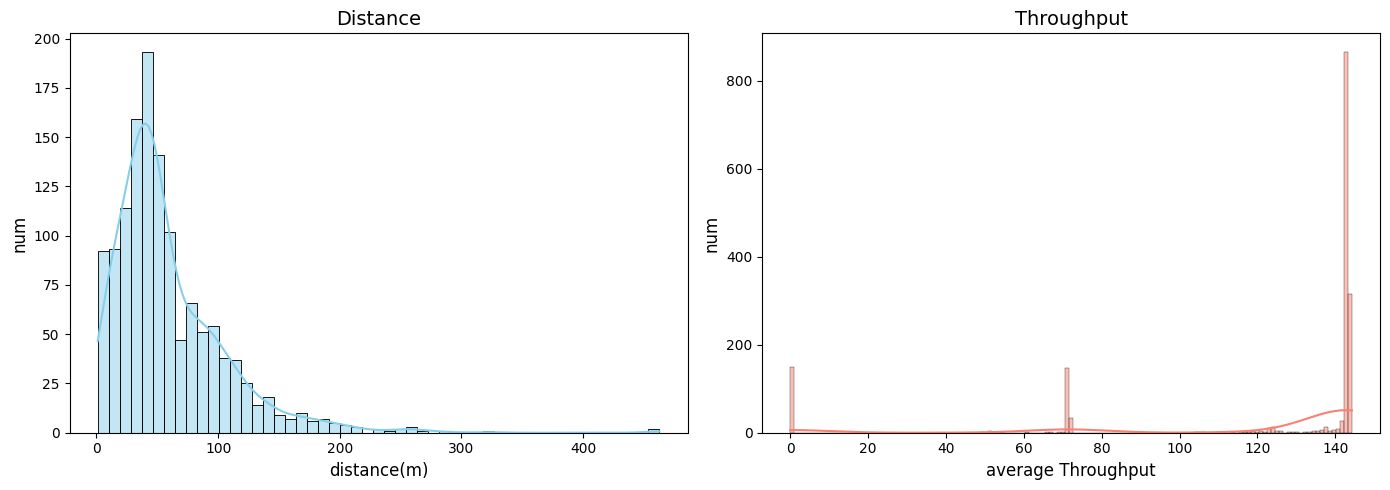

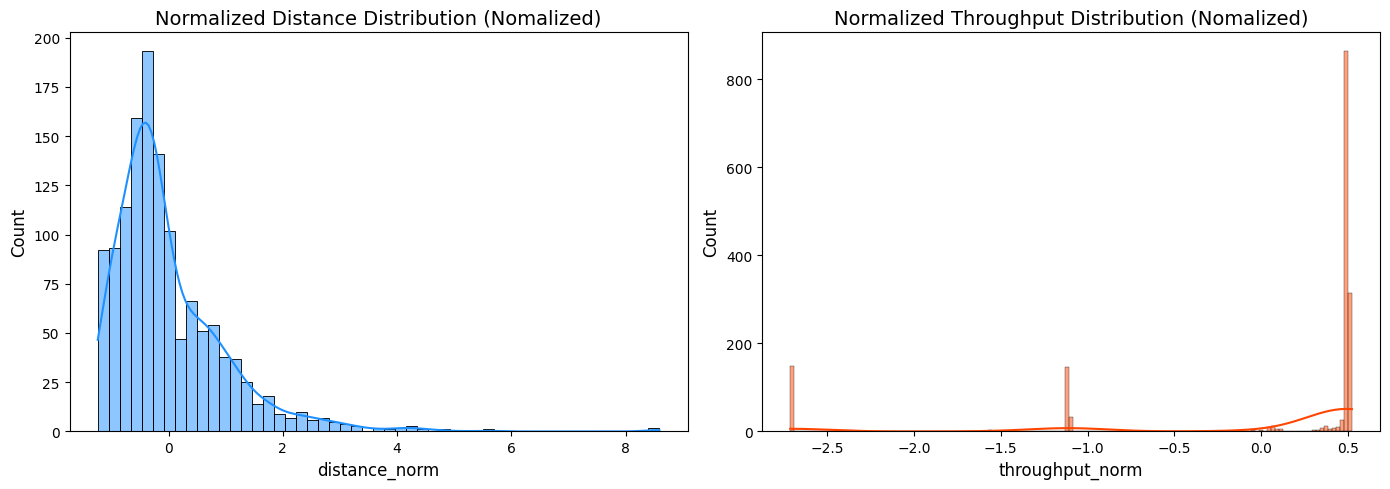

‚úÖ Ï≤òÎ¶¨Ïú® Ïä§ÏºÄÏùº Ï°∞Ï†ï: ÌëúÏ§ÄÌé∏Ï∞® 0.059 -> 0.425, ÌèâÍ∑† Ïú†ÏßÄ(0.461)


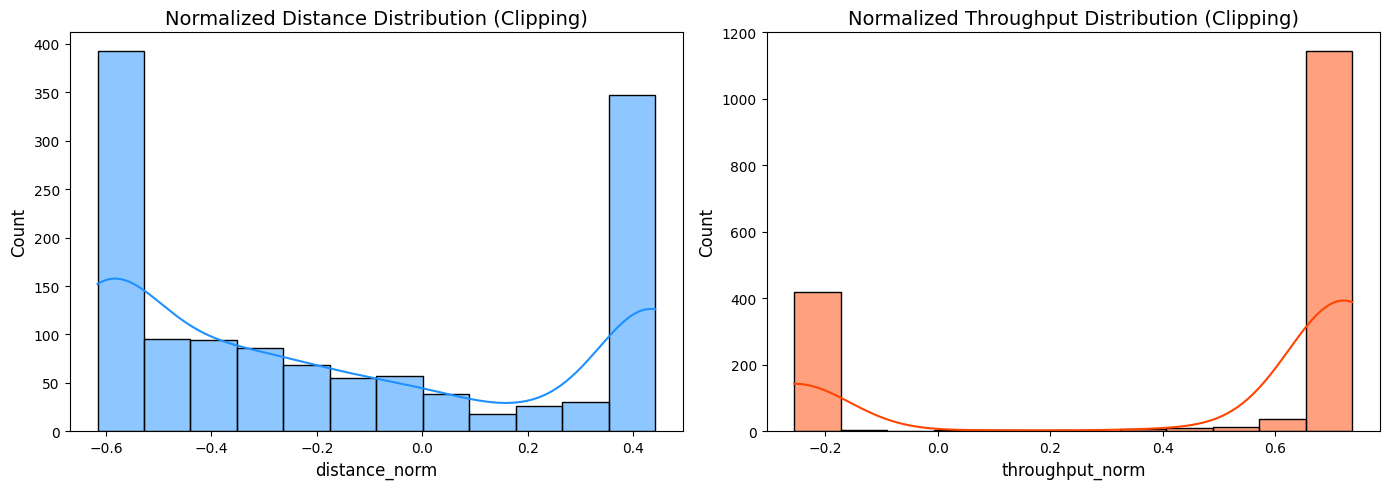

In [ ]:
# 1Ô∏è‚É£ ÏóëÏÖÄ Îç∞Ïù¥ÌÑ∞ Î°úÎìú
df = pd.read_excel(r"g:\ÎÇ¥ ÎìúÎùºÏù¥Î∏å\[4ÌïôÎÖÑ]\[Ï°∏ÏóÖ ÏûëÌíà]\distance_Throughput.xlsx")


# 2Ô∏è‚É£ ÏõêÎ≥∏ Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
plot_distribution(df)

# 3Ô∏è‚É£ ÌëúÏ§ÄÌé∏Ï∞® ÎèôÏùº Ï†ïÍ∑úÌôî
df_norm = normalize_data(df)

# 4Ô∏è‚É£ Ï†ïÍ∑úÌôî ÌõÑ Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
plot_normalized_distribution(df_norm, title_suffix="(Nomalized)")

# 5Ô∏è‚É£ Í∑πÎã®Í∞í ÌÅ¥Î¶¨Ìïë
df_rescaled = clip_and_rescale(df_norm, quantile=0.25)


# 6Ô∏è‚É£ ÌÅ¥Î¶¨Ìïë ÌõÑ Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
plot_normalized_distribution(df_rescaled, title_suffix="(Clipping)")


In [ ]:
def summarize_after_clipping(df, norm_distance_col="distance_norm", norm_throughput_col="throughput_norm"):
    print("\nüìä [Í±∞Î¶¨ ÏöîÏïΩ]")
    print(f"- ÏµúÏÜåÍ∞í: {df[norm_distance_col].min():.3f}")
    print(f"- ÏµúÎåÄÍ∞í: {df[norm_distance_col].max():.3f}")
    print(f"- ÌèâÍ∑†: {df[norm_distance_col].mean():.3f}")
    print(f"- ÌëúÏ§ÄÌé∏Ï∞®: {df[norm_distance_col].std():.3f}")
    print(f"- 10% quantile: {df[norm_distance_col].quantile(0.1):.3f}")
    print(f"- 90% quantile: {df[norm_distance_col].quantile(0.9):.3f}")
    print(f"- Í∞úÏàò: {len(df)}")

    print("\nüìä [Ï≤òÎ¶¨Ïú® ÏöîÏïΩ]")
    print(f"- ÏµúÏÜåÍ∞í: {df[norm_throughput_col].min():.3f}")
    print(f"- ÏµúÎåÄÍ∞í: {df[norm_throughput_col].max():.3f}")
    print(f"- ÌèâÍ∑†: {df[norm_throughput_col].mean():.3f}")
    print(f"- ÌëúÏ§ÄÌé∏Ï∞®: {df[norm_throughput_col].std():.3f}")
    print(f"- 10% quantile: {df[norm_throughput_col].quantile(0.1):.3f}")
    print(f"- 90% quantile: {df[norm_throughput_col].quantile(0.9):.3f}")
    print(f"- Í∞úÏàò: {len(df)}")


In [ ]:
# df_rescaledÎäî clip_and_rescale Ïù¥ÌõÑ Î∞òÌôòÎêú Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ
summarize_after_clipping(df_rescaled)



üìä [Í±∞Î¶¨ ÏöîÏïΩ]
- ÏµúÏÜåÍ∞í: -0.616
- ÏµúÎåÄÍ∞í: 0.442
- ÌèâÍ∑†: -0.154
- ÌëúÏ§ÄÌé∏Ï∞®: 0.425
- 10% quantile: -0.616
- 90% quantile: 0.442
- Í∞úÏàò: 1648

üìä [Ï≤òÎ¶¨Ïú® ÏöîÏïΩ]
- ÏµúÏÜåÍ∞í: -0.255
- ÏµúÎåÄÍ∞í: 0.737
- ÌèâÍ∑†: 0.461
- ÌëúÏ§ÄÌé∏Ï∞®: 0.425
- 10% quantile: -0.255
- 90% quantile: 0.737
- Í∞úÏàò: 1648
